# Qual o próximo hit do Spotify

In [344]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [345]:
# carregamento dos conjuntos de dados
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [346]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34200 entries, 0 to 34199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_unique_id   34200 non-null  int64  
 1   track_id          34200 non-null  object 
 2   artists           34199 non-null  object 
 3   album_name        34199 non-null  object 
 4   track_name        34199 non-null  object 
 5   duration_ms       34200 non-null  int64  
 6   explicit          34200 non-null  bool   
 7   danceability      34200 non-null  float64
 8   energy            34200 non-null  float64
 9   key               34200 non-null  int64  
 10  loudness          34200 non-null  float64
 11  mode              34200 non-null  int64  
 12  speechiness       34200 non-null  float64
 13  acousticness      34200 non-null  float64
 14  instrumentalness  34200 non-null  float64
 15  liveness          34200 non-null  float64
 16  valence           34200 non-null  float6

In [347]:
# Informações sobre cada coluna do df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [348]:
# Estatístcas básicas de cada coluna numérica
df_train.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


- A média de `popularity_target` é aproximadamente 0,49, indicando que há um equilíbrio entre músicas populares e não populares no conjunto.
- A maioria das faixas está em assinatura de tempo 4/4 (`time_signature`).

## Limpeza e Tratamento

In [349]:
# Verificar se há duplicatas
duplicatas = df_train[df_train.duplicated(keep='first')]
print(duplicatas)

Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, popularity_target]
Index: []

[0 rows x 21 columns]


Não há linhas duplicadas no conjunto de dados.

In [350]:
# Verificar se há duplicatas
duplicatas = df_test[df_test.duplicated(keep='first')]
print(duplicatas)

Empty DataFrame
Columns: [track_unique_id, track_id, artists, album_name, track_name, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []


In [351]:
# Verifica se há valores nulos
print(f"{df_train.isnull().sum()}")

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


In [352]:
# Verifica se há valores nulos
print(f"{df_train.isnull().sum()}")

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


Nenhuma coluna possui valores nulos.

In [353]:
# Exclusão de colunas
df_sem_col = df_train.drop(columns=['track_id', 'track_name', 'album_name', 'artists'])
df_sem_col 

,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,211533,False,0.305,0.84900,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,196000,False,0.287,0.19000,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,216506,False,0.583,0.50900,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,218346,False,0.163,0.03680,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,173160,False,0.647,0.92100,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,76820,162613,False,0.554,0.00763,4,-30.566,1,0.0502,0.915000,0.000970,0.2210,0.1560,119.502,4,opera,1
79796,110268,240062,False,0.689,0.55400,9,-8.200,1,0.0759,0.091000,0.914000,0.0867,0.1630,148.002,4,trance,0
79797,103694,136306,False,0.629,0.56000,0,-11.455,0,0.0523,0.595000,0.000000,0.1820,0.8800,118.895,3,soul,0
79798,860,216841,False,0.421,0.10700,6,-15.191,1,0.0335,0.948000,0.000000,0.0881,0.1180,104.218,4,acoustic,1


In [354]:
# Exclusão de colunas
df_sem_col_test = df_test.drop(columns=['track_id', 'track_name', 'album_name', 'artists'])
df_sem_col_test

,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.005110,0.000000,0.176,0.0466,148.014,4,world-music
1,42819,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.005210,0.801000,0.420,0.0294,122.223,4,grindcore
2,59311,213578,False,0.173,0.803,9,-10.071,0,0.1440,0.613000,0.001910,0.195,0.0887,75.564,3,iranian
3,91368,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.406000,0.000197,0.111,0.5980,109.991,3,rock
4,61000,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.484000,0.000000,0.266,0.8130,92.487,4,j-idol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34195,39480,216650,False,0.597,0.980,7,-2.075,1,0.0636,0.004270,0.000035,0.293,0.6330,139.989,4,german
34196,74692,219493,False,0.454,0.367,0,-12.251,1,0.0285,0.137000,0.000029,0.171,0.1420,113.250,4,mpb
34197,53782,165333,True,0.687,0.915,0,-1.342,1,0.0411,0.021000,0.000006,0.151,0.2720,89.962,4,house
34198,41890,293040,False,0.362,0.668,0,-9.578,1,0.0432,0.000406,0.009400,0.131,0.1580,122.234,4,goth


As colunas `track_unique_id`, `track_id`, `track_name`, `artists` e `album_name` podem não ser úteis diretamente para prever a popularidade da música, dado que elas apenas identificam cada música em específico e não caracteríscas das músicas, e podem ser removidas para evitar redundância e excesso de dados textuais não informativos. Contudo, é importante manter track id para identificação da música na predição.

In [355]:
# DEfinição das colunas numéricas
colunas_numericas = df_sem_col.select_dtypes(include=['number'])

In [356]:
# Checar quais são os outliers
for col in colunas_numericas:
    # Cálculo do IQR para uma coluna
    Q1 = df_sem_col[col].quantile(0.10)
    Q3 = df_sem_col[col].quantile(0.90)
    IQR = Q3 - Q1

    # Definindo limites
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrando outliers
    outliers = df_sem_col[(df_sem_col[col] < limite_inferior) | (df_sem_col[col] > limite_superior)]
    print(col)
    print(outliers)


track_unique_id
Empty DataFrame
Columns: [track_unique_id, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre, popularity_target]
Index: []
duration_ms
       track_unique_id  duration_ms  explicit  danceability  energy  key  \
223              54657      1664000     False         0.295  0.4830    0   
1191             13903       641584     False         0.891  0.5110    1   
1657             11037       673269     False         0.251  0.1700    2   
1706             65475      3340672     False         0.719  0.4660    3   
1760             72262      1003746      True         0.277  0.9100    7   
...                ...          ...       ...           ...     ...  ...   
78978            34620       655760     False         0.297  0.6550    9   
79012            93714       625173     False         0.318  0.0981    1   
79122            34911      1749173     False     

Algumas colunas possuem valores que estão acima dos 90% ou abaixo dos 10%:
* `time_signature`
* `duration_ms`
* `loudness`
* `speechiness`
* `liveness`

In [357]:
# Colunas que possuem outliers
cols_outliers = ['time_signature', 'duration_ms', 'loudness', 'speechiness', 'liveness']

In [358]:
def winsorize(df, column):
    Q1 = df[column].quantile(0.10)
    Q3 = df[column].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Substituir outliers pelos limites
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# Lista de colunas que possuem outliers
cols_outliers = ['time_signature', 'duration_ms', 'loudness', 'speechiness', 'liveness']

# Aplicar Winsorization em cada coluna especificada
for col in cols_outliers:
    df_sem_outliers = winsorize(df_sem_col, col)

A função acima realiza do tratamento dessses outliers, os valores que estão abaixo do limite inferior são substituídos pelo limite inferior, e os valores que estão acima do limite superior são substituídos pelo limite superior.

In [359]:
df_sem_outliers

,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,211533.0,False,0.305,0.84900,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4.0,goth,0
1,76471,196000.0,False,0.287,0.19000,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4.0,opera,0
2,54809,216506.0,False,0.583,0.50900,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,4.0,idm,1
3,16326,218346.0,False,0.163,0.03680,8,-23.149,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,4.0,classical,0
4,109799,173160.0,False,0.647,0.92100,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4.0,techno,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,76820,162613.0,False,0.554,0.00763,4,-29.917,1,0.0502,0.915000,0.000970,0.2210,0.1560,119.502,4.0,opera,1
79796,110268,240062.0,False,0.689,0.55400,9,-8.200,1,0.0759,0.091000,0.914000,0.0867,0.1630,148.002,4.0,trance,0
79797,103694,136306.0,False,0.629,0.56000,0,-11.455,0,0.0523,0.595000,0.000000,0.1820,0.8800,118.895,4.0,soul,0
79798,860,216841.0,False,0.421,0.10700,6,-15.191,1,0.0335,0.948000,0.000000,0.0881,0.1180,104.218,4.0,acoustic,1


In [360]:
# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Seleciona as colunas para normalizar
colunas_a_normalizar = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'tempo']

# Aplica o MinMaxScaler nas colunas numéricas
df_sem_outliers[colunas_a_normalizar] = scaler.fit_transform(df_sem_outliers[colunas_a_normalizar])

df_sem_outliers


,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,0.333100,False,0.309645,0.848997,0.818182,0.555081,1,0.0549,0.000058,0.056700,0.4640,0.3200,0.636971,4.0,goth,0
1,76471,0.306987,False,0.291371,0.189984,0.636364,0.519231,0,0.0370,0.930000,0.000356,0.0834,0.1330,0.375935,4.0,opera,0
2,54809,0.341460,False,0.591878,0.508990,0.090909,0.588000,1,0.0362,0.777000,0.202000,0.1150,0.5440,0.406366,4.0,idm,1
3,16326,0.344553,False,0.165482,0.036781,0.727273,0.196464,1,0.0472,0.991000,0.899000,0.1070,0.0387,0.311952,4.0,classical,0
4,109799,0.268592,False,0.656853,0.920998,0.181818,0.656710,1,0.1850,0.000939,0.371000,0.1310,0.1710,0.619847,4.0,techno,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,76820,0.250861,False,0.562437,0.007611,0.363636,0.000000,1,0.0502,0.915000,0.000970,0.2210,0.1560,0.536834,4.0,opera,1
79796,110268,0.381059,False,0.699492,0.553991,0.818182,0.630410,1,0.0759,0.091000,0.914000,0.0867,0.1630,0.664864,4.0,trance,0
79797,103694,0.206637,False,0.638579,0.559991,0.000000,0.535923,0,0.0523,0.595000,0.000000,0.1820,0.8800,0.534107,4.0,soul,0
79798,860,0.342023,False,0.427411,0.106983,0.545455,0.427472,1,0.0335,0.948000,0.000000,0.0881,0.1180,0.468175,4.0,acoustic,1


As colunas `['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'tempo']` possuiam, de acordo com as estísticas básicas, valores de mínimo e máximo distantes e com escalas diferentes entre si; portanto, foi necessário realizar a normalização delas.

In [361]:
# Aplica o MinMaxScaler nas colunas numéricas
df_sem_col_test[colunas_a_normalizar] = scaler.fit_transform(df_sem_col_test[colunas_a_normalizar])
df_sem_col_test

,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,0.093070,False,0.376531,0.598,0.636364,0.828956,1,0.0304,0.005110,0.000000,0.176,0.0466,0.608180,4,world-music
1,42819,0.019858,False,0.174490,0.997,0.636364,0.895160,1,0.1180,0.005210,0.801000,0.420,0.0294,0.502206,4,grindcore
2,59311,0.045151,False,0.176531,0.803,0.818182,0.768811,0,0.1440,0.613000,0.001910,0.195,0.0887,0.310488,3,iranian
3,91368,0.032004,False,0.696939,0.511,0.545455,0.855960,1,0.0279,0.406000,0.000197,0.111,0.5980,0.451946,3,rock
4,61000,0.049953,False,0.566327,0.941,0.818182,0.900849,0,0.0481,0.484000,0.000000,0.266,0.8130,0.380023,4,j-idol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34195,39480,0.045800,False,0.609184,0.980,0.636364,0.924600,1,0.0636,0.004270,0.000035,0.293,0.6330,0.575206,4,german
34196,74692,0.046401,False,0.463265,0.367,0.000000,0.726338,1,0.0285,0.137000,0.000029,0.171,0.1420,0.465337,4,mpb
34197,53782,0.034952,True,0.701020,0.915,0.000000,0.938881,1,0.0411,0.021000,0.000006,0.151,0.2720,0.369648,4,house
34198,41890,0.061950,False,0.369388,0.668,0.000000,0.778416,1,0.0432,0.000406,0.009400,0.131,0.1580,0.502252,4,goth


In [362]:
df_sem_outliers.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.0,79800.000000
mean,57140.494048,0.357867,0.575958,0.641522,0.482458,0.629281,0.637732,0.080055,0.314979,0.157319,0.213190,0.474267,0.548400,4.0,0.487845
std,32993.196225,0.141701,0.175746,0.251446,0.323835,0.142570,0.480659,0.078296,0.332512,0.310792,0.189587,0.259010,0.134507,0.0,0.499855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.0,0.000000
25%,28450.500000,0.270737,0.462944,0.471990,0.181818,0.577985,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,0.445099,4.0,0.000000
50%,57234.000000,0.335251,0.589848,0.684994,0.454545,0.664896,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,0.548096,4.0,0.000000
75%,85774.250000,0.416973,0.705584,0.853997,0.727273,0.723301,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,0.629159,4.0,1.000000
max,113998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.394400,0.996000,1.000000,0.955750,0.995000,1.000000,4.0,1.000000


Conforme as estatíscas atualizadas, é visível que a escala agora está padronizada.

In [363]:
df_sem_time = df_sem_outliers.drop(columns='time_signature')

A coluna `time_signature` sem os outliers apresenta apenas o valor "4"; portanto, ela não faria diferença na predição do modelo.

## Codificação de Variáveis Categóricas

In [364]:
# Codificação One-Hot para variáveis categóricas
encoder = OneHotEncoder(sparse_output=False)
encoded_genres = pd.DataFrame(encoder.fit_transform(df_sem_outliers[['track_genre']]), 
                              columns=encoder.get_feature_names_out(['track_genre']))
df_encoded = pd.concat([df_sem_time.drop(columns=['track_genre']), encoded_genres], axis=1)
df_encoded

,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,41996,0.333100,False,0.309645,0.848997,0.818182,0.555081,1,0.0549,0.000058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,76471,0.306987,False,0.291371,0.189984,0.636364,0.519231,0,0.0370,0.930000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54809,0.341460,False,0.591878,0.508990,0.090909,0.588000,1,0.0362,0.777000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16326,0.344553,False,0.165482,0.036781,0.727273,0.196464,1,0.0472,0.991000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,109799,0.268592,False,0.656853,0.920998,0.181818,0.656710,1,0.1850,0.000939,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,76820,0.250861,False,0.562437,0.007611,0.363636,0.000000,1,0.0502,0.915000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79796,110268,0.381059,False,0.699492,0.553991,0.818182,0.630410,1,0.0759,0.091000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79797,103694,0.206637,False,0.638579,0.559991,0.000000,0.535923,0,0.0523,0.595000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79798,860,0.342023,False,0.427411,0.106983,0.545455,0.427472,1,0.0335,0.948000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para a coluna `track_genre`, o método esolhido foi o One Hot Enconder, que transforma variáveis categóricas em colunas binárias, em que, para cada categoria, os valores são representados por 1 para a categoria correspondente e 0 para as demais.

In [365]:
# Codificação One-Hot para variáveis categóricas
df_encoded_test = pd.concat([df_sem_col_test.drop(columns=['track_genre']), encoded_genres], axis=1)
df_encoded_test

,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,113186.0,0.093070,False,0.376531,0.598,0.636364,0.828956,1.0,0.0304,0.00511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42819.0,0.019858,False,0.174490,0.997,0.636364,0.895160,1.0,0.1180,0.00521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59311.0,0.045151,False,0.176531,0.803,0.818182,0.768811,0.0,0.1440,0.61300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91368.0,0.032004,False,0.696939,0.511,0.545455,0.855960,1.0,0.0279,0.40600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61000.0,0.049953,False,0.566327,0.941,0.818182,0.900849,0.0,0.0481,0.48400,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
79797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [366]:
df_encoded['explicit'] = df_encoded['explicit'].astype(int)

In [367]:
# df_encoded_test['explicit'] = df_encoded_test['explicit'].astype(int)

A coluna `explicit` continha os valores `True` e `False`, que foram substituidos respectivamente por 1 e 0.

## Exploração e Visualização dos Dados

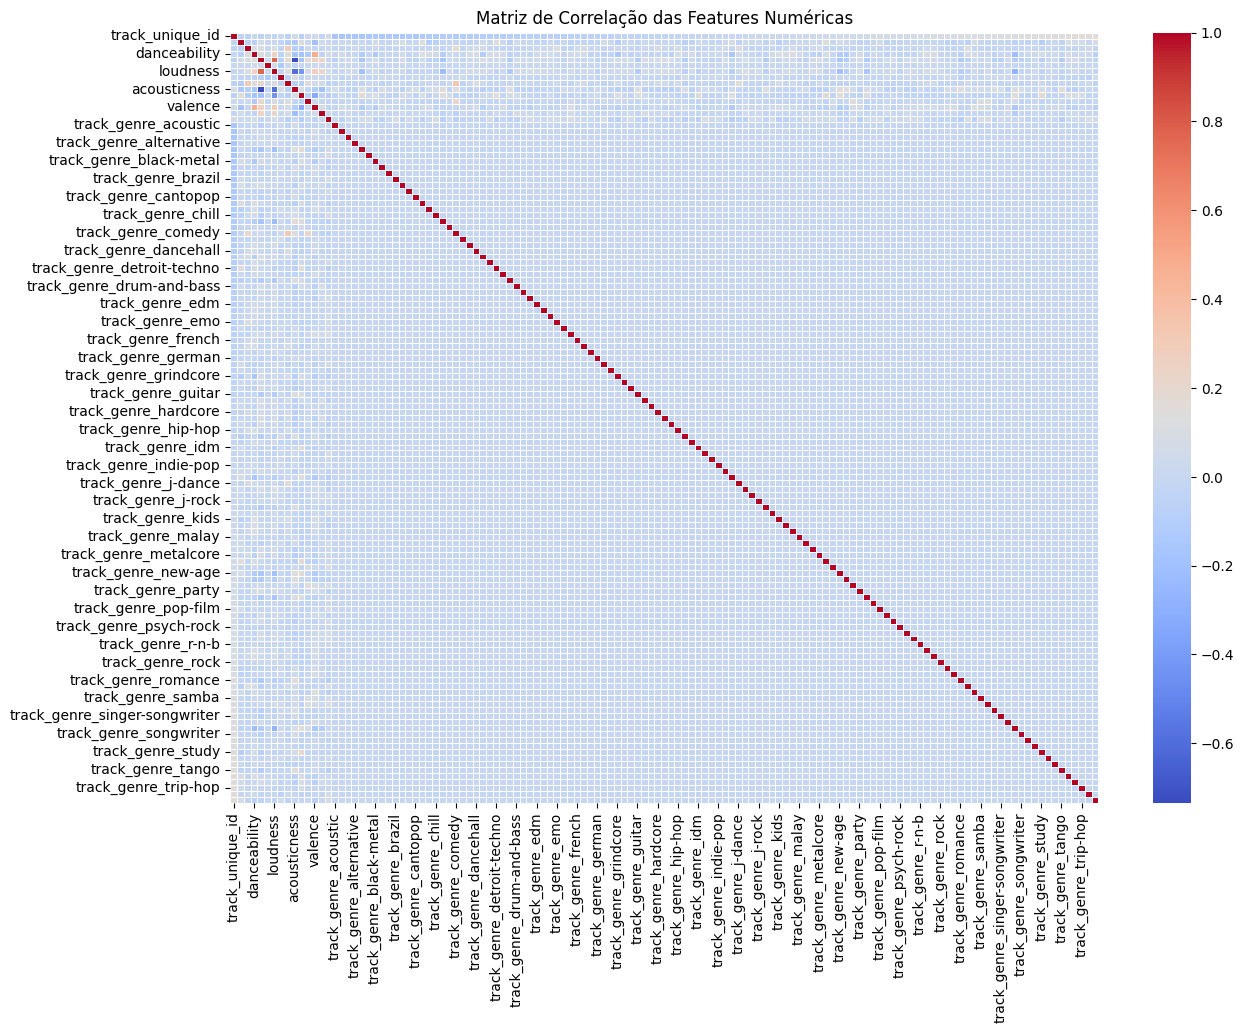

In [368]:
# Definindo o tamanho da figura para melhor visualização
plt.figure(figsize=(14,10))

# Criando um heatmap da matriz de correlação
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Exibir o gráfico
plt.title("Matriz de Correlação das Features Numéricas")
plt.show()

A maior parte da matriz está em um tom azul claro, sugerindo que não há muitas correlações fortes (nem positivas nem negativas) entre as variáveis. No entanto, algumas regiões pequenas mostram correlações fracas (com pontos ligeiramente mais vermelhos ou azuis):

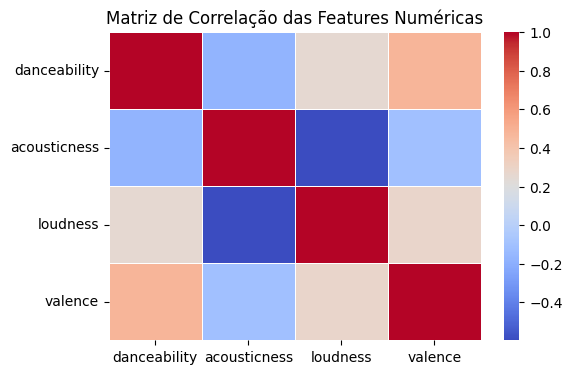

In [369]:
df_correlacao = df_encoded[['danceability', 'acousticness', 'loudness', 'valence']]

plt.figure(figsize=(6,4))

# Criando um heatmap da matriz de correlação
sns.heatmap(df_correlacao.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Exibir o gráfico
plt.title("Matriz de Correlação das Features Numéricas")
plt.show()


* Acousticness tem correlação negativa forte com loudness, o que faz sentido, já que músicas acústicas tendem a ser mais suaves.
* Danceability tem uma leve correlação positiva com valence, sugerindo que músicas mais dançáveis são geralmente mais alegres.
* Poucas correlações muito fortes além dessas, sugerindo que essas características variam independentemente em muitos casos.

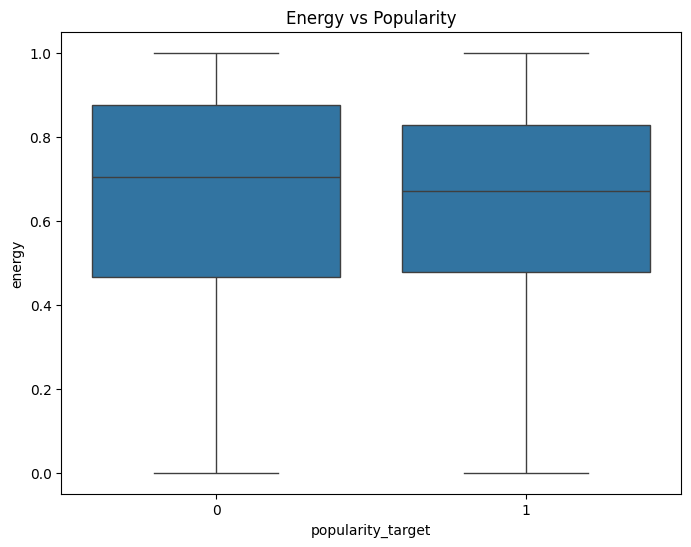

In [370]:
# Relação entre 'energy' e 'popularity_target'
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='energy', data=df_encoded)
plt.title('Energy vs Popularity')
plt.show()

A diferença entre a energia das faixas populares e não populares parece ser mínima, sugerindo que a energia das faixas não é um fator distintivo claro para determinar a popularidade, dado que as distribuições são bastante semelhantes em ambos os casos.

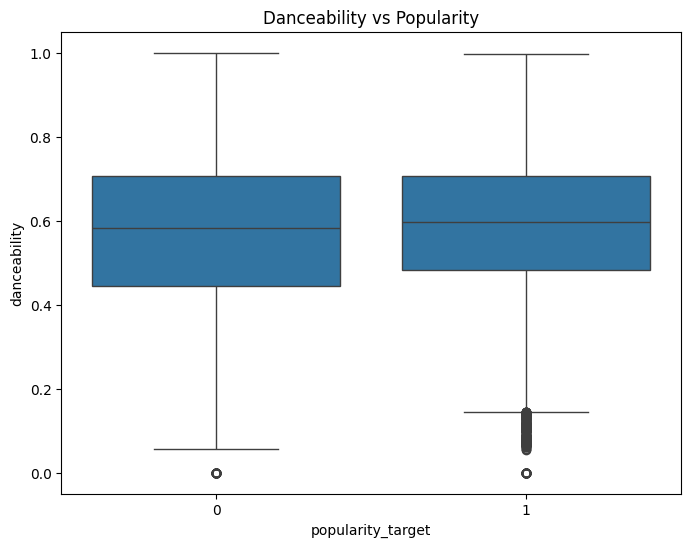

In [371]:
# Relação entre 'danceability' e 'popularity_target'
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='danceability', data=df_encoded)
plt.title('Danceability vs Popularity')
plt.show()

O gráfico sugere que, embora a dançabilidade seja uma característica relevante tanto para músicas populares quanto para as não populares, ela não parece ser um fator decisivo na distinção entre essas categorias.

## Hipóteses

Portanto, com base nos gráficos apresentados

## Seleção de Features

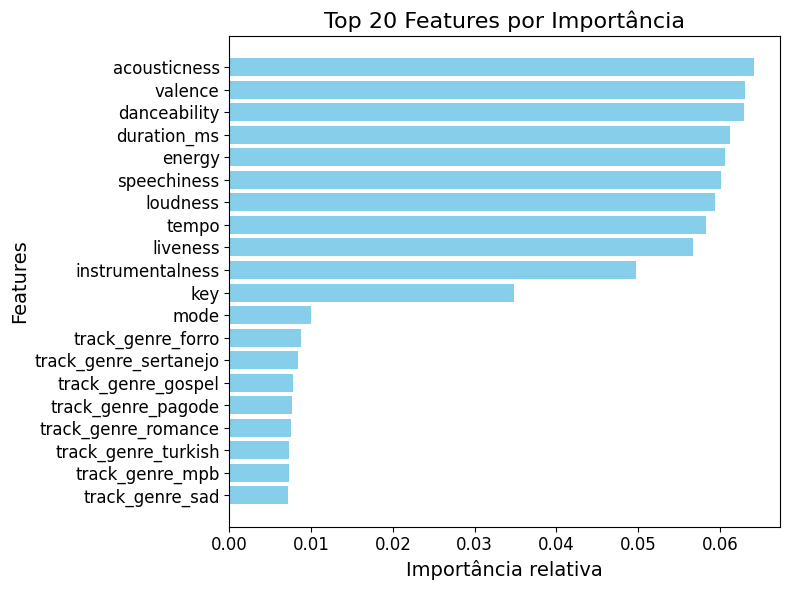

In [372]:
# Modelo Random Forest paar definir importância das Features
model = RandomForestClassifier(random_state=42)
model.fit(df_encoded.drop(columns=['track_unique_id', 'popularity_target']), df_encoded['popularity_target'])

# Importância de cada feature
feature_importances = model.feature_importances_
features = df_encoded.drop(columns=['track_unique_id', 'popularity_target']).columns

# Gera uma relação entre as features e sua importância no resultado
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Seleciona as 15 features mais importantes
top_20_features = importance_df.head(20)

# Gráfico para visualização das 15 principais importâncias das features
plt.figure(figsize=(8, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color='skyblue')
plt.xlabel('Importância relativa', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 20 Features por Importância', fontsize=16)
plt.gca().invert_yaxis()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

- As features `acousticness`, `valence` e `danceability` são as mais importantes no modelo.
- Gêneros musicais aparecem com menor importância, indicando que as características técnicas da música são mais relevantes do que o gênero em si para este modelo.
- `duration_ms` e `energy`, também têm uma alta importância, destacando que a duração e a energia da faixa são importantes para a predição do modelo.

Isso indica que as características musicais relacionadas à composição da faixa (acústica, positividade, energia) desempenham papéis mais importantes do que o gênero musical para a tarefa preditiva realizada.

In [373]:
# Seleção das features
features = df_encoded.drop(columns=['popularity_target', 'track_unique_id']).columns
target = ['popularity_target']

## Construção e Avaliação do Modelo

In [374]:
X = df_encoded[features]
y = df_encoded[target]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [375]:
# Função para calcular métricas de avaliação dos modelos
def metricas(model):
   
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"A acurácia do modelo Random Forest é: {accuracy:.2f}")

    precision = precision_score(y_test, y_pred)
    print(f"A precisãa do modelo Random Forest é: {precision:.2f}")

    recall = recall_score(y_test, y_pred)
    print(f"O recall do modelo Random Forest é: {recall:.2f}")

In [376]:
model_rf = RandomForestClassifier(random_state=42, n_estimators=200)
model_rf.fit(X_train, y_train)
metricas(model_rf)

c:\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Finetuning de Hiperparâmetros

In [333]:
# Função para realizar a busca de hiperparâmetros
def optimize_model(model, param_grid, X_train, y_train):
    # Cria um objeto GridSearchCV para realizar a busca em grade de hiperparâmetros
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Treina o modelo utilizando os dados de treinamento
    grid_search.fit(X_train, y_train)

    # Imprime os melhores hiperparâmetros encontrados para o modelo
    print(f"Melhores parâmetros para {model.__class__.__name__}: {grid_search.best_params_}")
    
    # Retorna o modelo ajustado com os melhores hiperparâmetros
    return grid_search.best_estimator_

In [335]:
# # Parâmetros para otimização de Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Aplicar a otimização de hiperparâmetros para cada modelo
# optimized_rf = optimize_model(RandomForestClassifier(random_state=42), param_grid_rf, X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\ensemble\_forest.py", line 489, in fit
    trees = Parallel(
            ^^^^^^^^^
  File "c:\Python312\Lib

Melhores parâmetros para RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [336]:
rf = RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)
rf.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [337]:
metricas(optimized_rf)

A acurácia do modelo Random Forest é: 0.83
A precisãa do modelo Random Forest é: 0.83
O recall do modelo Random Forest é: 0.83


## Teste

In [343]:
# Fazendo as previsões
y_pred = optimized_rf.predict(df_sem_col_test[features])

# Criando um DataFrame com os IDs das músicas e as previsões
submission_df = pd.DataFrame({
    'track_unique_id': df_sem_col_test['track_unique_id'],
    'popularity_target': y_pred
})

# Salvando o DataFrame em um arquivo CSV
submission_df.to_csv('submission.csv', index=False)


KeyError: "['track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'track_genre_garage', 'track_genre_german', 'track_genre_gospel', 'track_genre_goth', 'track_genre_grindcore', 'track_genre_groove', 'track_genre_grunge', 'track_genre_guitar', 'track_genre_happy', 'track_genre_hard-rock', 'track_genre_hardcore', 'track_genre_hardstyle', 'track_genre_heavy-metal', 'track_genre_hip-hop', 'track_genre_honky-tonk', 'track_genre_house', 'track_genre_idm', 'track_genre_indian', 'track_genre_indie', 'track_genre_indie-pop', 'track_genre_industrial', 'track_genre_iranian', 'track_genre_j-dance', 'track_genre_j-idol', 'track_genre_j-pop', 'track_genre_j-rock', 'track_genre_jazz', 'track_genre_k-pop', 'track_genre_kids', 'track_genre_latin', 'track_genre_latino', 'track_genre_malay', 'track_genre_mandopop', 'track_genre_metal', 'track_genre_metalcore', 'track_genre_minimal-techno', 'track_genre_mpb', 'track_genre_new-age', 'track_genre_opera', 'track_genre_pagode', 'track_genre_party', 'track_genre_piano', 'track_genre_pop', 'track_genre_pop-film', 'track_genre_power-pop', 'track_genre_progressive-house', 'track_genre_psych-rock', 'track_genre_punk', 'track_genre_punk-rock', 'track_genre_r-n-b', 'track_genre_reggae', 'track_genre_reggaeton', 'track_genre_rock', 'track_genre_rock-n-roll', 'track_genre_rockabilly', 'track_genre_romance', 'track_genre_sad', 'track_genre_salsa', 'track_genre_samba', 'track_genre_sertanejo', 'track_genre_show-tunes', 'track_genre_singer-songwriter', 'track_genre_ska', 'track_genre_sleep', 'track_genre_songwriter', 'track_genre_soul', 'track_genre_spanish', 'track_genre_study', 'track_genre_swedish', 'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno', 'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish', 'track_genre_world-music'] not in index"